# Entrenamiento de modelos de vino

# Dataset de los vinos red

In [1]:
# 📦 Librerías estándar
import os

# 📊 Visualización
import matplotlib.pyplot as plt
import seaborn as sns


# 🧪 Scikit-learn
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score,
    auc,
    classification_report,
    ConfusionMatrixDisplay,
    confusion_matrix,
    f1_score,
    mean_squared_error,
    precision_score,
    recall_score,
    roc_curve,
    RocCurveDisplay,
    r2_score,
)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import label_binarize, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

#modelos optuna
from xgboost import XGBClassifier
import optuna
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score


# 💾 Guardado de modelos
import joblib



# 📐 Numpy y Pandas
import numpy as np
import pandas as pd

c:\Users\gvald\Desktop\vinooo\Examen_final_1\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Exploracion de df

In [2]:
path_white = 'C:\\Users\\gvald\\Desktop\\examen_final_1\\selected_dataset\\dataset_winte_clean.csv'
df_white = pd.read_csv(path_white)
df_white.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4898 non-null   int64  
 1   fixed acidity         4898 non-null   float64
 2   volatile acidity      4898 non-null   float64
 3   citric acid           4898 non-null   float64
 4   residual sugar        4898 non-null   float64
 5   chlorides             4898 non-null   float64
 6   free sulfur dioxide   4898 non-null   float64
 7   total sulfur dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4898 non-null   float64
 10  sulphates             4898 non-null   float64
 11  alcohol               4898 non-null   float64
 12  quality               4898 non-null   int64  
 13  came                  4898 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 535.8+ KB


In [3]:
path_red = 'C:\\Users\\gvald\\Desktop\\examen_final_1\\selected_dataset\\dataset_red_clean.csv'
df_red = pd.read_csv(path_red)
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1599 non-null   int64  
 1   fixed acidity         1599 non-null   float64
 2   volatile acidity      1599 non-null   float64
 3   citric acid           1599 non-null   float64
 4   residual sugar        1599 non-null   float64
 5   chlorides             1599 non-null   float64
 6   free sulfur dioxide   1599 non-null   float64
 7   total sulfur dioxide  1599 non-null   float64
 8   density               1599 non-null   float64
 9   pH                    1599 non-null   float64
 10  sulphates             1599 non-null   float64
 11  alcohol               1599 non-null   float64
 12  quality               1599 non-null   int64  
 13  came                  1599 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 175.0+ KB


Fusión de df

In [4]:
df = pd.concat([df_red, df_white], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  came                  6497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


In [5]:
df.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,came
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [6]:
df = df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  came                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


No se observan anomalías evidentes en las estadísticas resumidas

In [7]:
# Limpieza de espacios
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
ph,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [9]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
came                    0
dtype: int64

In [10]:
df["came"].value_counts()

came
white    4898
red      1599
Name: count, dtype: int64

In [11]:
df["quality"].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

En la columna de quality nos falta la calidad 1 y 2 lo cual afecta la prediccion de esta clase los vinos

# Graficos

In [12]:
df["quality"].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [13]:
df_calidad_vino = df.groupby(["quality", "came"]).size().unstack().round(0)
df_calidad_vino

came,red,white
quality,,
3,10.0,20.0
4,53.0,163.0
5,681.0,1457.0
6,638.0,2198.0
7,199.0,880.0
8,18.0,175.0
9,NaN,5.0


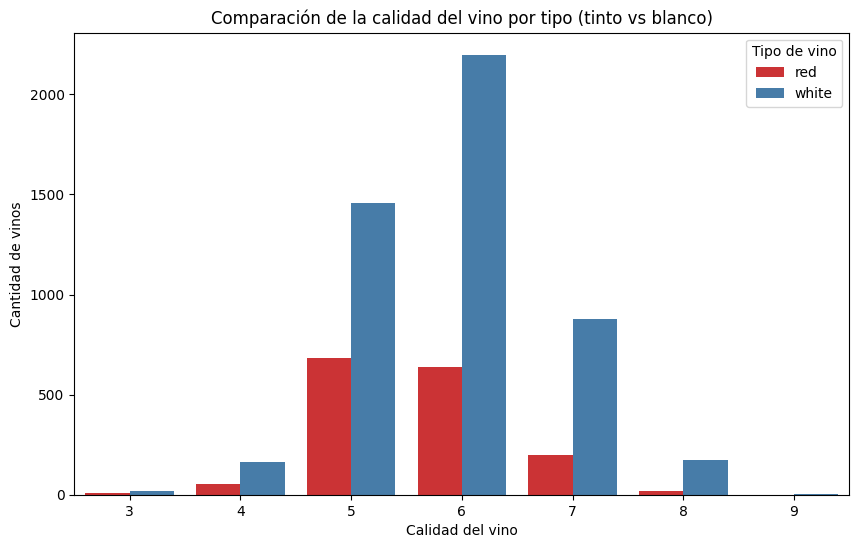

In [14]:

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='quality', hue='came', palette='Set1')

plt.title('Comparación de la calidad del vino por tipo (tinto vs blanco)')
plt.xlabel('Calidad del vino')
plt.ylabel('Cantidad de vinos')
plt.legend(title='Tipo de vino')
plt.show()

Este gráfico lo creamos para tener una visión de la comparación de la cantidad de vino respecto a su calidad
1. Hay mas cantidad de vino blanco respecto al rojo
2. Hay mas vino de calidad 6 y la que tiene mas es el blanco


Gráfico de correlación de df

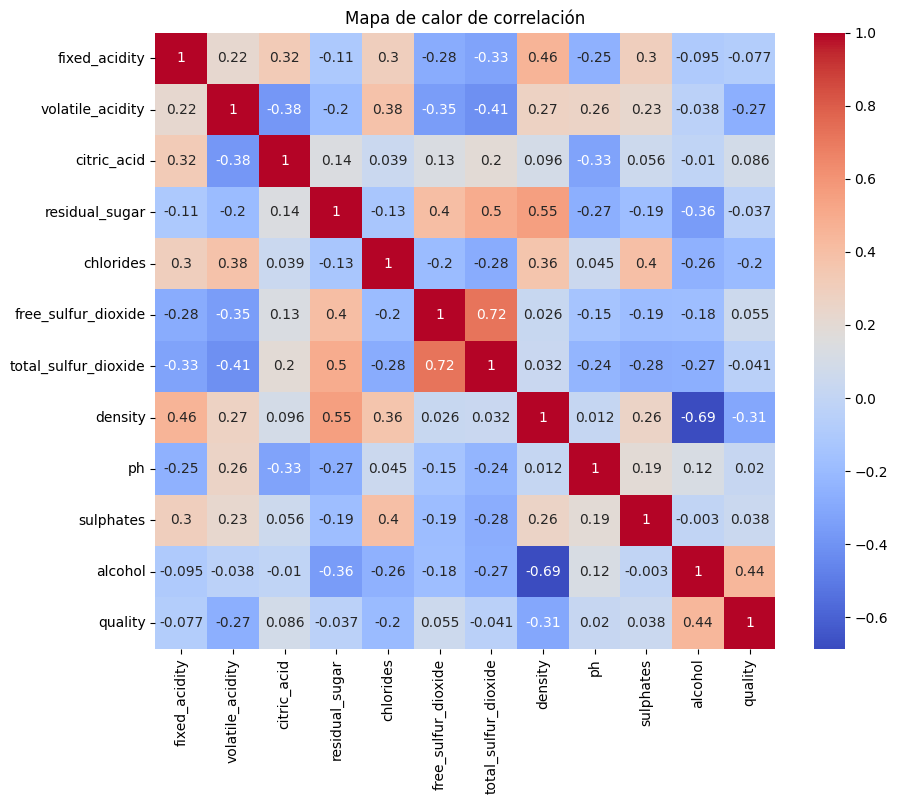

In [17]:
corr = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación')
roc_path = 'C:\\Users\\gvald\\Desktop\\vinooo\\Examen_final_1\\assets\\map_corr.png'
plt.savefig(roc_path, dpi=300, bbox_inches='tight') 
plt.show()

El grafico de correlacion nos muestra que los datos tienen correlacion nos ayuda a saber que columnas sirven mas en el modelo.
1. Es variada ahun que se visualiza que domina el 0.002  y el 0.4

# Preprocesador

In [ ]:
df_ml = df

Categorizar calidad

In [ ]:
# df_ml['came'] = df['came'].map({'white': 0, 'red': 1})

In [ ]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  came                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df_ml.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,came
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'came'],
      dtype='object')

In [ ]:
df["quality"].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

In [ ]:
quality_to_label = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5,
    9: 6
}

df["quality_clas"] = df["quality"].map(quality_to_label)

In [ ]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,came,quality_clas
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,2


In [ ]:
X = df.drop(columns=['quality_clas'])
y = df['quality_clas']

In [ ]:
# le = LabelEncoder()
# y_encoded = le.fit_transform(y)

# print("Clases originales:", le.classes_)  # Muestra las clases originales antes de codificar
# print("Clases codificadas:", sorted(set(y_encoded)))

Queda registrado esta modificación de LabelEncoder() para codificar el Y ya que este empieza 3 al 9 y ahora con esta modificación está empezara de 0 al 6 ayudando al entrenamiento

**Codificacion descartado** 

In [ ]:
# Separar variables.
num_cols = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density','quality',
       'ph', 'sulphates', 'alcohol']
cat_cols = ['came']

In [ ]:
# Split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN  KNeighborsClassifier

In [ ]:
# ColumnTransformer
preprocessor_knn = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("ord", OneHotEncoder(), cat_cols)
])

In [ ]:
knn_pipeline = Pipeline([
    ("pp", preprocessor_knn),
    ("modelo", KNeighborsClassifier())
])

**Ocupamos GridSearchCV para encontra el mejor neighbors adecuado para el modelo knn**

In [ ]:
knn_params = {
    "modelo__n_neighbors": [5,10,20,40,100] 
}

knn_grid = GridSearchCV(knn_pipeline, knn_params, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train, y_train)

c:\Users\gvald\Desktop\examen_final_1\env\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


,estimator,Pipeline(step...lassifier())])
,param_grid,"{'modelo__n_neighbors': [5, 10, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('ord', ...)]"


In [ ]:
# Evaluación.
knn_best = knn_grid.best_estimator_
y_pred_knn = knn_best.predict(X_test)

In [ ]:
print("KNN Regressor")
print("Mejores parámetros:", knn_grid.best_params_)

KNN Regressor
Mejores parámetros: {'modelo__n_neighbors': 5}


**Como salio Mejores parámetros: {'modelo__n_neighbors': 20} vamos a usar 20 para el modelo knn**

In [ ]:
# Modelo.
pipeline_knn = Pipeline([
    ("preprocessing", preprocessor_knn),
    ("model", KNeighborsClassifier(n_neighbors=5))
])

In [ ]:
# Entrenamiento.
pipeline_knn.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ord', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
# Prediccion.
y_pred_knn = pipeline_knn.predict(X_test)

In [ ]:
# print("Valores únicos en y_test:", np.unique(y_test))
# print("Valores únicos en y_pred_knn:", np.unique(y_pred_knn))

Valores únicos en y_test: [0 1 2 3 4 5 6]
Valores únicos en y_pred_knn: [0 1 2 3 4 5]


Se usa este print para visualizar las clases con la que se entrenara

# LogisticRegression

In [ ]:
# ColumnTransformer
preprocessor_Regresión = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("ord", OneHotEncoder(), cat_cols)
])

In [ ]:
# Pipeline con logistic regression.
pipeline_line_Regresion = Pipeline([
    ('preprocessor', preprocessor_Regresión),
    ('regressor', LogisticRegression())
])

In [ ]:
# Entrenar.
pipeline_line_Regresion.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ord', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
# Prediccion.
y_pred_line_Regresion = pipeline_line_Regresion.predict(X_test)

# RandomForestClassifier

In [ ]:
preprocessor_Random = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ("ord", OneHotEncoder(), cat_cols)
])

In [ ]:
# Pipeline con RandomForest
pipeline_forest_regressor = Pipeline(steps=[
    ("preprocessing", preprocessor_Random),
    ("regressor", RandomForestClassifier(class_weight='balanced' ,n_estimators=100, random_state=42))
])

In [ ]:
pipeline_forest_regressor.fit(X_train, y_train)

,steps,"[('preprocessing', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ord', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
# Prediccion.
y_pred_forest_regressor = pipeline_forest_regressor.predict(X_test)

# Resultados los 3 modelosde Classifier y métricas
 
1. Accuracy knn con GridSearchCV = 0.55
2. Accuracy logisc = 0.54
3. Accuracy forest = 0.68

Segundo resultado con la integracion de la nueva columna quality_clas

1. Accuracy knn con GridSearchCV = 0.921
2. Accuracy logisc = 0.995
3. Accuracy forest = 0.994

KNN Classifier
Mejores parámetros: {'modelo__n_neighbors': 5}
Accuracy: 0.9215384615384615

Reporte clasificación:
               precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.86      0.44      0.58        43
           2       0.91      0.94      0.93       402
           3       0.93      0.98      0.96       597
           4       0.91      0.92      0.91       215
           5       0.95      0.50      0.65        36
           6       0.00      0.00      0.00         1

    accuracy                           0.92      1300
   macro avg       0.72      0.56      0.61      1300
weighted avg       0.92      0.92      0.92      1300



c:\Users\gvald\Desktop\examen_final_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gvald\Desktop\examen_final_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gvald\Desktop\examen_final_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

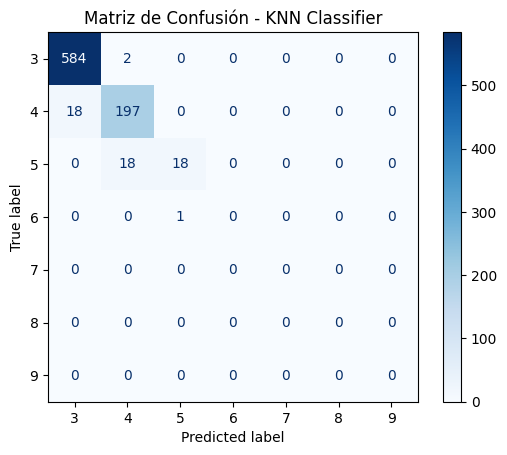

Logistic Regression
Accuracy: 0.9953846153846154

Reporte clasificación:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50         6
           1       0.91      0.98      0.94        43
           2       1.00      1.00      1.00       402
           3       1.00      1.00      1.00       597
           4       1.00      1.00      1.00       215
           5       0.97      1.00      0.99        36
           6       0.00      0.00      0.00         1

    accuracy                           1.00      1300
   macro avg       0.84      0.76      0.78      1300
weighted avg       0.99      1.00      0.99      1300



c:\Users\gvald\Desktop\examen_final_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gvald\Desktop\examen_final_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gvald\Desktop\examen_final_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

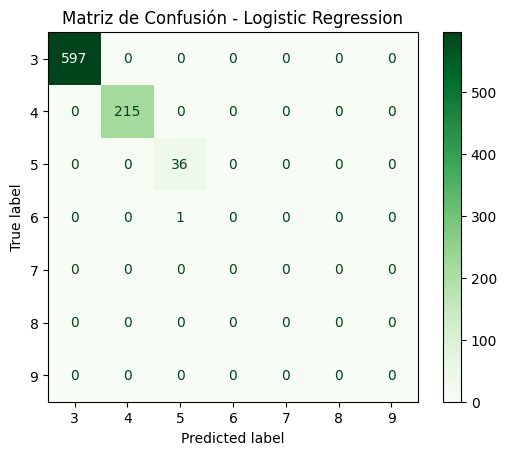

Random Forest
Accuracy: 0.9946153846153846

Reporte clasificación:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.95      0.93      0.94        43
           2       0.99      1.00      1.00       402
           3       1.00      1.00      1.00       597
           4       1.00      1.00      1.00       215
           5       0.97      1.00      0.99        36
           6       0.00      0.00      0.00         1

    accuracy                           0.99      1300
   macro avg       0.85      0.80      0.82      1300
weighted avg       0.99      0.99      0.99      1300



c:\Users\gvald\Desktop\examen_final_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gvald\Desktop\examen_final_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\gvald\Desktop\examen_final_1\env\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

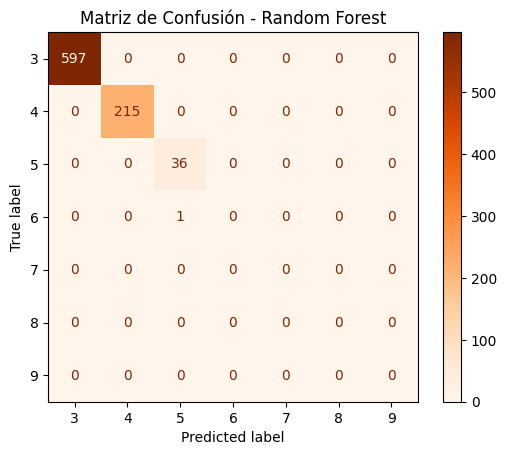

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

classes = [3, 4, 5, 6, 7, 8, 9]

print("KNN Classifier")
print("Mejores parámetros:", knn_grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nReporte clasificación:\n", classification_report(y_test, y_pred_knn))

cm_knn = confusion_matrix(y_test, y_pred_knn, labels=classes)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=classes)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusión - KNN Classifier")
plt.show()

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_line_Regresion))
print("\nReporte clasificación:\n", classification_report(y_test, y_pred_line_Regresion))

cm_log = confusion_matrix(y_test, y_pred_line_Regresion, labels=classes)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=classes)
disp_log.plot(cmap=plt.cm.Greens)
plt.title("Matriz de Confusión - Logistic Regression")
plt.show()

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_forest_regressor))
print("\nReporte clasificación:\n", classification_report(y_test, y_pred_forest_regressor))

cm_rf = confusion_matrix(y_test, y_pred_forest_regressor, labels=classes)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=classes)
disp_rf.plot(cmap=plt.cm.Oranges)
plt.title("Matriz de Confusión - Random Forest")
plt.show()

# Modelo XGBOOST para clasificacion 

* Se pudo llegar a un Accuracy de 0.6654  

Segundo intento con la columna quality_clas

* Se pudo llegar a un Accuracy de 1.000

In [ ]:
# Preprocesamiento.
preprocessor_xgboost = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("ord", OneHotEncoder(), cat_cols)
])

In [ ]:
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 25),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),  # Mejora rendimiento
    }

    pipeline = Pipeline([
        ("pp", preprocessor_xgboost),
        ("model", XGBClassifier(
            random_state=42,
            use_label_encoder=False,
            eval_metric="logloss",
            **params
        ))
    ])

    score = cross_val_score(pipeline, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
    return score.mean()

In [ ]:
print("Clases en y_train:", np.unique(y_train))

Clases en y_train: [0 1 2 3 4 5 6]


In [ ]:
# Optuna.
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)


best_params = study.best_params
print("Mejores hiperparámetros (clasificación):", best_params)

[I 2025-07-11 22:57:43,435] A new study created in memory with name: no-name-96ab8956-5e6b-4ec5-950c-1ecc8ab404f9
[I 2025-07-11 22:57:44,298] Trial 0 finished with value: 0.9992303991662991 and parameters: {'n_estimators': 429, 'max_depth': 14, 'subsample': 0.6265506503457632, 'colsample_bytree': 0.9695575406795904, 'learning_rate': 0.10024688001872255}. Best is trial 0 with value: 0.9992303991662991.
[I 2025-07-11 22:57:44,721] Trial 1 finished with value: 0.9992303991662991 and parameters: {'n_estimators': 104, 'max_depth': 8, 'subsample': 0.7910489123328959, 'colsample_bytree': 0.7314381778178296, 'learning_rate': 0.010550686362425628}. Best is trial 0 with value: 0.9992303991662991.
[I 2025-07-11 22:57:45,584] Trial 2 finished with value: 0.9992303991662991 and parameters: {'n_estimators': 492, 'max_depth': 3, 'subsample': 0.7674695959613846, 'colsample_bytree': 0.7640436095786348, 'learning_rate': 0.260455550866572}. Best is trial 0 with value: 0.9992303991662991.
[I 2025-07-11 22

Mejores hiperparámetros (clasificación): {'n_estimators': 403, 'max_depth': 13, 'subsample': 0.9999700666745963, 'colsample_bytree': 0.9545451977607137, 'learning_rate': 0.013987386726583189}


In [ ]:
# Pipeline.
model = Pipeline([
  ("pp", preprocessor_xgboost),
  ("model", XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss", **best_params))
])

In [ ]:
# Entrenamiento.
model.fit(X_train, y_train)

c:\Users\gvald\Desktop\examen_final_1\env\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:58:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,steps,"[('pp', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('ord', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
# Evaluacion.
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy en test: {acc:.4f}")


Accuracy en test: 1.0000


In [ ]:
from joblib import dump
dump(model, 'C:\\Users\\gvald\\Desktop\\examen_final_1\\model\\model_calidad_vino.csv')
print("Modelo guardado exitosamente.")


Modelo guardado exitosamente.


# Conclusion modelos de classificacion 
1. Accuracy knn con GridSearchCV = 0.921
2. Accuracy logisc = 0.995
3. Accuracy forest = 0.994
3. Modelo hiperparámetros XGBOOST =  1.000

El modelo con mejor predicción inicialmente fue Logistic Regression, alcanzando una accuracy de 0.995, lo que indica un desempeño muy alto, pero con cierto margen para mejorar.

Dicha mejora se logró aplicando la optimización de hiperparámetros mediante Optuna al modelo XGBoost, alcanzando una precisión perfecta de 1.000.





